# Analysis of changes in nightly lows at Rochester, NY over last 50 years

### Everyone is aware of global worming caused by the increased CO2 content and CH4 content in our atmosphere, the former being caused by the combustion of fossile fuels and the latter being caused by thawing of tundra and gas flares. It is also well known that the international community strives to limit global warming by about 1.5 fahrenheit degrees. Nevertheless, authorities say we may have reached this 1.5 fahrenheit degree increase.

### This project looks at the change in nightly lows in the last 60 years in Washington DC to see how it has changed as compared to the global increase of 1.5 fahrenheit degrees. Is the change in nightly lows greater? Why? Can this be all attributed to global warming? Or are other factors at play here such as the urban heat island effect?

### Of particular note, after living in Washington DC for some time, I notice that on the local news, the record lows are in the negative double digits in Fahrenheit. But it has almost never gotten below 10F sinche I have been here, which is 25 years. Why? Can I show this on a graph? Why is this so? Certainly a global warming of 1.5 Fahrenheit degrees could not solely be the cause of never getting within 20 Fahrenheit degrees of our past record lows.

### This project will explore these issues.

### The data was imported from the National Centers for Environmental Information of NOAA (i.e. the National Weather Service)

## After downloading data to my local PC, I now read it in and inspect it. Notice that only the date and the minimum temperatures in Fahrenheit are read in

In [71]:
import pandas as pd
# Program to extract number
# of rows using Python
#import xlrd
 
# Give the location of the file
#loc = ("C:\Users\user\Downloads\rocmintemp1a.csv")
df = pd.read_csv("C:\\Users\\Matthew\\Desktop\\datasets\\rocmintemp1a.csv")
print(df.head())
print('ldlsl')


       STATION      DATE   MIN
0  72529014768  01/01/73  33.8
1  72529014768  01/02/73  21.2
2  72529014768  01/03/73  21.2
3  72529014768  01/04/73  34.0
4  72529014768  01/05/73  24.8
ldlsl


### I now explore the read in data

In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  17897 non-null  int64  
 1   DATE     17897 non-null  object 
 2   MIN      17897 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 419.6+ KB
None


### do not that the date column is object type. This will have to be converted to datetime

In [73]:
print(df.shape)

(17897, 3)


In [74]:
print(df.describe())

            STATION           MIN
count  1.789700e+04  17897.000000
mean   7.252901e+10     39.867112
std    0.000000e+00     76.504429
min    7.252901e+10    -22.000000
25%    7.252901e+10     27.000000
50%    7.252901e+10     39.000000
75%    7.252901e+10     54.000000
max    7.252901e+10   9999.900000


In [75]:
dmin = df[df['MIN'] == -22.0]
print(dmin)

          STATION      DATE   MIN
2239  72529014768  02/18/79 -22.0


### do note the min temp of 9999.000. This row will have to be removed in a cleaning step

In [76]:
print(df['MIN'].value_counts())

 32.0    440
 59.0    364
 50.0    351
 33.1    351
 34.0    341
        ... 
 79.0      1
-5.3       1
-9.2       1
-13.0      1
 74.8      1
Name: MIN, Length: 200, dtype: int64


In [77]:
df2 = df[df['MIN'] < 100.0]
print(df2.shape)

(17896, 3)


### only one row was eliminated in this cleaning step

In [78]:
print(df2)

           STATION      DATE   MIN
0      72529014768  01/01/73  33.8
1      72529014768  01/02/73  21.2
2      72529014768  01/03/73  21.2
3      72529014768  01/04/73  34.0
4      72529014768  01/05/73  24.8
...            ...       ...   ...
17892  72529014768  12/27/21  26.6
17893  72529014768  12/28/21  27.0
17894  72529014768  12/29/21  32.0
17895  72529014768  12/30/21  32.0
17896  72529014768  12/31/21  35.1

[17896 rows x 3 columns]


In [79]:
df2 = df2[df2['MIN'] > -23.0]
print(df2.shape)

(17896, 3)


In [80]:
df2['DATE'] = pd.to_datetime(df['DATE'])
print(df2.shape)
print(df2.head(90))

(17896, 3)
        STATION       DATE   MIN
0   72529014768 1973-01-01  33.8
1   72529014768 1973-01-02  21.2
2   72529014768 1973-01-03  21.2
3   72529014768 1973-01-04  34.0
4   72529014768 1973-01-05  24.8
..          ...        ...   ...
86  72529014768 1973-03-28  24.1
87  72529014768 1973-03-29  46.9
88  72529014768 1973-03-30  47.8
89  72529014768 1973-03-31  46.9
90  72529014768 1973-04-01  52.9

[90 rows x 3 columns]


In [81]:
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
print(df2.head())

       STATION       DATE   MIN  year  month
0  72529014768 1973-01-01  33.8  1973      1
1  72529014768 1973-01-02  21.2  1973      1
2  72529014768 1973-01-03  21.2  1973      1
3  72529014768 1973-01-04  34.0  1973      1
4  72529014768 1973-01-05  24.8  1973      1


### After forming month and year columns derived from the date column, we will now focus on the coldest months of the year (Dec to March) and store in df3 

In [82]:
df3 = df2[(df2['month'] > 11) | (df2['month'] < 4)]
print(df3.shape)

(5940, 5)


### Unfortunately, December is of a different year than Jan thru March. I'll remedy this issue by adding a new column called 'season' to allow for December to be grouped with Jan thru March of the next calendar year

In [83]:
df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] < 4 else f"{x['year']}/{x['year']+1}", axis=1)
print(df3.head())

       STATION       DATE   MIN  year  month     season
0  72529014768 1973-01-01  33.8  1973      1  1972/1973
1  72529014768 1973-01-02  21.2  1973      1  1972/1973
2  72529014768 1973-01-03  21.2  1973      1  1972/1973
3  72529014768 1973-01-04  34.0  1973      1  1972/1973
4  72529014768 1973-01-05  24.8  1973      1  1972/1973


C:\Users\Matthew\AppData\Local\Temp/ipykernel_15380/160414122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] < 4 else f"{x['year']}/{x['year']+1}", axis=1)


In [84]:
meeny = df3.groupby(['season'])['MIN'].mean()

### we will now calculate the average low temperature in Fahrenheit for each winter season of Dec 1 to March 31 for each year 1973 to 2021

In [85]:
print(meeny)

season
1972/1973    24.198876
1973/1974    20.492562
1974/1975    22.819008
1975/1976    19.967213
1976/1977    17.257851
1977/1978    16.131405
1978/1979    17.514876
1979/1980    19.022131
1980/1981    16.645455
1981/1982    18.960331
1982/1983    26.501653
1983/1984    20.516393
1984/1985    22.424793
1985/1986    21.311570
1986/1987    22.558678
1987/1988    22.040164
1988/1989    21.609917
1989/1990    22.088430
1990/1991    24.885950
1991/1992    21.858197
1992/1993    20.007438
1993/1994    17.095041
1994/1995    23.757025
1995/1996    16.976230
1996/1997    23.505785
1997/1998    26.867769
1998/1999    21.695041
1999/2000    22.257377
2000/2001    19.561983
2001/2002    25.238843
2002/2003    17.318182
2003/2004    19.721311
2004/2005    17.940496
2005/2006    23.567769
2006/2007    23.352893
2007/2008    21.487705
2008/2009    19.656198
2009/2010    21.833884
2010/2011    18.570248
2011/2012    27.221311
2012/2013    23.794215
2013/2014    15.924793
2014/2015    15.679339
2015

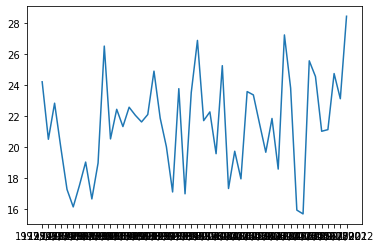

In [86]:
import matplotlib.pyplot as plt
plt.plot(meeny)
plt.show()

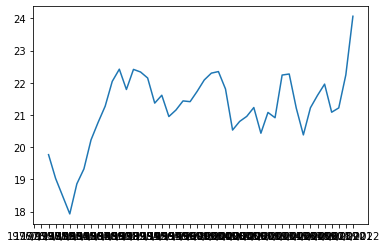

In [87]:
import matplotlib.pyplot as plt
plt.plot(meeny.rolling(7).mean())
plt.show()

### The second (i.e. lower) graph is averaged over 7 years, and clearly seems to show an outsized increase in temperatures compared to the global 1.5 fahrenheit average.  Furthermore, in the last few years of 2017 to 2021, it has increased dramatically as compared to just a 1.5 Fahrenheit increase in global temperatures.
### Now, I will focus on the number of nightly lows each season that dropped below a certain threshold. I opted for Zero Fahrenheit as it shows a cold night well below the norm

In [88]:
zippo = df3.groupby('season')['MIN'].apply(lambda x: x[x < 0.0].count())
print(zippo)

season
1972/1973     3
1973/1974     5
1974/1975     0
1975/1976     8
1976/1977     8
1977/1978    11
1978/1979    13
1979/1980     4
1980/1981    14
1981/1982     8
1982/1983     1
1983/1984     5
1984/1985     3
1985/1986     1
1986/1987     3
1987/1988     3
1988/1989     1
1989/1990     4
1990/1991     0
1991/1992     0
1992/1993     6
1993/1994    12
1994/1995     0
1995/1996     6
1996/1997     2
1997/1998     0
1998/1999     4
1999/2000     7
2000/2001     0
2001/2002     0
2002/2003    13
2003/2004     9
2004/2005     9
2005/2006     0
2006/2007     0
2007/2008     0
2008/2009     0
2009/2010     2
2010/2011     3
2011/2012     0
2012/2013     0
2013/2014    14
2014/2015    15
2015/2016     3
2016/2017     0
2017/2018     7
2018/2019     4
2019/2020     0
2020/2021     0
2021/2022     0
Name: MIN, dtype: int64


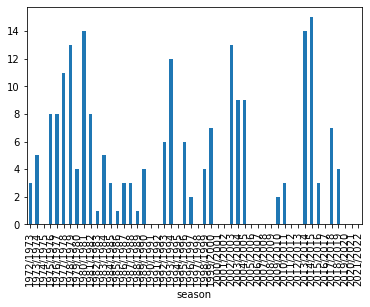

In [89]:
import matplotlib.pyplot as plt
zippo.plot.bar()
plt.show()

### data and graph above sow a dramatic grop in occurrences of nightly lows falling below the threshold of 0F in Rochester, NY. Note that the recently, about half of all winter seasons had no nights falling below 0F

In [90]:
ziproll = zippo.rolling(10).mean()
print(ziproll)

season
1972/1973    NaN
1973/1974    NaN
1974/1975    NaN
1975/1976    NaN
1976/1977    NaN
1977/1978    NaN
1978/1979    NaN
1979/1980    NaN
1980/1981    NaN
1981/1982    7.4
1982/1983    7.2
1983/1984    7.2
1984/1985    7.5
1985/1986    6.8
1986/1987    6.3
1987/1988    5.5
1988/1989    4.3
1989/1990    4.3
1990/1991    2.9
1991/1992    2.1
1992/1993    2.6
1993/1994    3.3
1994/1995    3.0
1995/1996    3.5
1996/1997    3.4
1997/1998    3.1
1998/1999    3.4
1999/2000    3.7
2000/2001    3.7
2001/2002    3.7
2002/2003    4.4
2003/2004    4.1
2004/2005    5.0
2005/2006    4.4
2006/2007    4.2
2007/2008    4.2
2008/2009    3.8
2009/2010    3.3
2010/2011    3.6
2011/2012    3.6
2012/2013    2.3
2013/2014    2.8
2014/2015    3.4
2015/2016    3.7
2016/2017    3.7
2017/2018    4.4
2018/2019    4.8
2019/2020    4.6
2020/2021    4.3
2021/2022    4.3
Name: MIN, dtype: float64


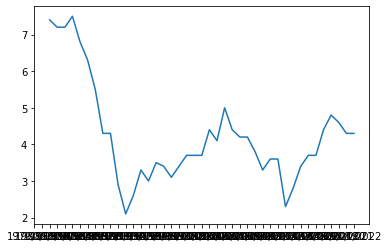

In [91]:
plt.plot(ziproll)
plt.show()

### a rolling featur is applied to the linegraph to average each datapoint according to the previous 7 data points to get a more smooth plot. Notice the huge percentage drop in nightly lows falling below this 0F threshold! I find it hard to believe that this can be statistically explained by just a 1.5 Fahrenheit degrees increase in global temperatures.

In [92]:
jandat = df2[df2['month'] == 1]
#print(janmin)
dfjanminmean = jandat.groupby(['year'])['MIN'].mean()
print (dfjanminmean)

year
1973    22.158065
1974    19.990323
1975    20.667742
1976    11.870968
1977     7.509677
1978    15.232258
1979    14.580645
1980    16.861290
1981     7.070968
1982     9.574194
1983    22.283871
1984    15.212903
1985    14.370968
1986    18.106452
1987    19.870968
1988    17.374194
1989    22.561290
1990    26.980645
1991    19.035484
1992    19.325806
1993    21.203226
1994     7.219355
1995    25.893548
1996    14.222581
1997    16.480645
1998    24.616129
1999    16.070968
2000    13.664516
2001    19.658065
2002    24.822581
2003    10.200000
2004     9.000000
2005    13.503226
2006    26.777419
2007    22.674194
2008    22.477419
2009    11.141935
2010    17.354839
2011    14.967742
2012    21.877419
2013    19.735484
2014    12.270968
2015     9.877419
2016    18.832258
2017    25.067742
2018    15.754839
2019    15.422581
2020    22.400000
2021    22.587097
Name: MIN, dtype: float64


In [93]:
juldat = df2[df2['month'] == 7]
#print(janmin)
dfjulminmean = juldat.groupby(['year'])['MIN'].mean()
print (dfjulminmean)

year
1973    59.748387
1974    57.400000
1975    59.303226
1976    58.225806
1977    62.032258
1978    59.483871
1979    60.348387
1980    60.803226
1981    60.538710
1982    62.567742
1983    63.877419
1984    57.570968
1985    58.945161
1986    61.612903
1987    63.770968
1988    61.845161
1989    61.706452
1990    61.700000
1991    62.416129
1992    58.806452
1993    62.629032
1994    64.000000
1995    61.354839
1996    59.329032
1997    58.125806
1998    59.564516
1999    62.861290
2000    56.087097
2001    56.729032
2002    61.593548
2003    58.867742
2004    58.661290
2005    61.893548
2006    64.561290
2007    57.174194
2008    60.341935
2009    55.606452
2010    62.145161
2011    61.709677
2012    61.800000
2013    62.848387
2014    58.770968
2015    59.645161
2016    62.448387
2017    61.190323
2018    62.458065
2019    62.883871
2020    64.035484
2021    60.383871
Name: MIN, dtype: float64


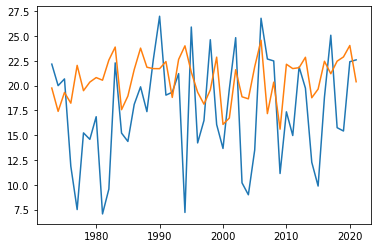

In [94]:
import matplotlib.pyplot as plt
plt.plot(dfjanminmean)
plt.plot(dfjulminmean - 40)
plt.show()

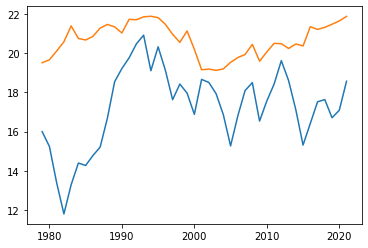

In [95]:
janroll = dfjanminmean.rolling(7).mean()
julroll = dfjulminmean.rolling(7).mean()
import matplotlib.pyplot as plt
plt.plot(janroll)
plt.plot(julroll - 40)
plt.show()

## Average July nightly lows (in yellow) barely changed over the last 50 years while average January nightly lows varied widely and have been steadily increasing, with the most pronounced increase in the last 5 years. 40 degrees Fahrenheit was subtracted from the July readings to superimpose the two graphs for easier comparison

# Mean seasonal low temperatures seems to show an outsized increase over the 50 year window of this dataset compared to the global 1.5 fahrenheit degree increase. Also, the changes in the last 5 years seem very dramatic compared to that over the remainder of the 50 year data window suggesting a rapid acceleration of global warming.